In [1]:
from mnist_tasks.generate_color_mnist import *
from mnist_tasks.mnist_loader import trainloader, testloader
from mnist_tasks.generate_rotated_mnist import *

In [2]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [10]:
'''
mechanism: 
1. modify position
2. change color
'''
transform = {
    "background": transform_digit_color,
    "full": transform_image
}
random_generator = {
    "background": generate_random_digit_color,
    "full": generate_random_environment
}

#change the const below to change generator
MODE = "full"

#digits to store
digits_to_store = [0, 1]

store_dir = os.path.join("artifacts", "generated_env", "multi", f"{10 if len(digits_to_store) == 0 else len(digits_to_store)}_digits")
if not os.path.isdir(store_dir):
    os.makedirs(store_dir)

In [32]:
def transform_with_env(transforms_position, env_color=None, loader=None):
    images = torch.zeros((1,3,28,28))
    y_true = []
    for batch_idx, (imgs, labels) in tqdm(enumerate(loader)):
        if len(digits_to_store) > 0:
            mask = np.logical_or(labels == digits_to_store[0], labels == digits_to_store[1])
            imgs = imgs[mask,:,:,:]
            labels = labels[mask]
        for transform_p_func in transforms_position:
            env_pos = transforms_position[transform_p_func]
            imgs = transform_p_func(imgs, labels, env_pos)
            transformed_imgs = imgs
        if env_color:
            transformed_imgs = transform[MODE](imgs, labels,env_color)
        images=torch.vstack((images,transformed_imgs))
        y_true.extend(labels.detach().cpu().numpy())
    images = images[1:,:,:,:]
    y_true = torch.Tensor(y_true)
    return images, y_true

In [12]:
def show_random_images(images):
    random_samples = np.random.choice(np.linspace(0, images.shape[0]-1, images.shape[0], dtype=int), 100)
    random_samples = images[random_samples, :,:,:]

    nrows = 10
    fig, ax = plt.subplots(nrows, ncols=random_samples.shape[0]//nrows)
    i=0

    for row in ax:
        for col in row:
            image = random_samples[i,:,:,:]*255
            col.imshow(image.permute(1,2,0).detach().cpu().numpy().astype(np.uint8))
            i+=1
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
    plt.show()

In [13]:
def save_env(img, labels, env_num, mode="train", suffix=""):
    if len(suffix) > 0:
        torch.save(img, os.path.join(store_dir,f"{mode}_env_{env_num}_{suffix}.pt"))
        torch.save(labels, os.path.join(store_dir,f"{mode}_labels_env_{env_num}_{suffix}.pt"))
    else:
        torch.save(img, os.path.join(store_dir,f"{mode}_env_{env_num}.pt"))
        torch.save(labels, os.path.join(store_dir,f"{mode}_labels_env_{env_num}.pt"))

In [43]:
color_1 = random_generator[MODE](digits_to_store)
position_transforms_1 = {
    rotate_digits: generate_transform_env(angles, digits_to_store),
    shift_digits: generate_transform_env(shift_factors, digits_to_store),
}

0it [00:00, ?it/s]/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  import sys
/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  
469it [01:09,  6.76it/s]


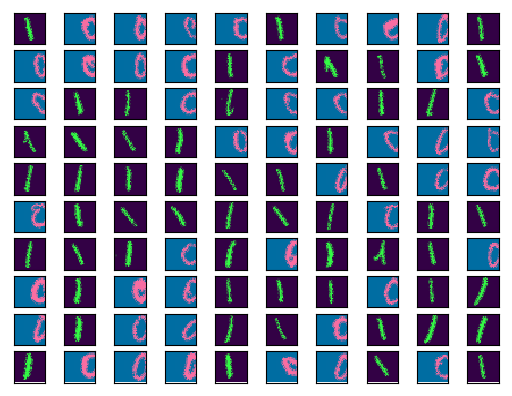

In [44]:
img_env_1_train, env_1_labels_train = transform_with_env(position_transforms_1, color_1, trainloader)
show_random_images(img_env_1_train)

In [45]:
save_env(img_env_1_train, env_1_labels_train, 2, "train")
img_env_1_test, env_1_labels_test = transform_with_env(position_transforms_1, color_1, testloader)
save_env(img_env_1_test, env_1_labels_test, 2, "test")

0it [00:00, ?it/s]/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  import sys
/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  
79it [00:09,  8.02it/s]


In [22]:
color_1 = random_generator[MODE](digits_to_store)
position_transforms_1 = {
    rotate_digits: generate_transform_env(angles, digits_to_store),
}

0it [00:00, ?it/s]/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  import sys
/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  
469it [00:32, 14.56it/s]


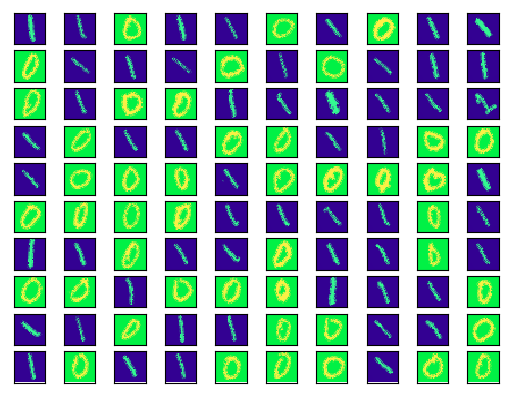

In [23]:
img_env_1_train, env_1_labels_train = transform_with_env(position_transforms_1, color_1, trainloader)
show_random_images(img_env_1_train)

In [24]:
save_env(img_env_1_train, env_1_labels_train, 3, "train")
img_env_1_test, env_1_labels_test = transform_with_env(position_transforms_1, color_1, testloader)
save_env(img_env_1_test, env_1_labels_test, 3, "test")



0it [00:00, ?it/s]/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  import sys
/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  
79it [00:03, 23.64it/s]


In [25]:
color_1 = random_generator[MODE](digits_to_store)
position_transforms_1 = {
    shift_digits: generate_transform_env(shift_factors, digits_to_store),
}

0it [00:00, ?it/s]/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  import sys
/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  
469it [00:31, 14.98it/s]


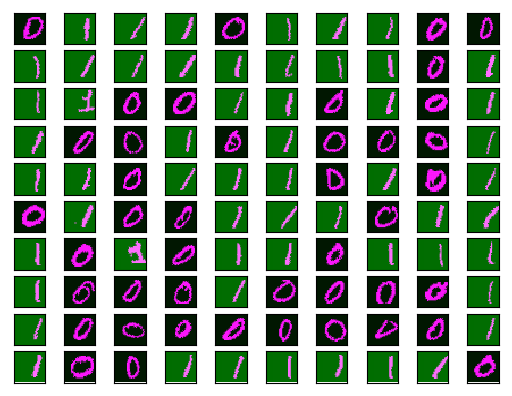

In [26]:
img_env_1_train, env_1_labels_train = transform_with_env(position_transforms_1, color_1, trainloader)
show_random_images(img_env_1_train)

In [27]:
save_env(img_env_1_train, env_1_labels_train, 4, "train")
img_env_1_test, env_1_labels_test = transform_with_env(position_transforms_1, color_1, testloader)

save_env(img_env_1_test, env_1_labels_test, 4, "test")

0it [00:00, ?it/s]/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  import sys
/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  
79it [00:02, 26.94it/s]


In [28]:
color_1 = random_generator[MODE](digits_to_store)
position_transforms_1 = {
    zoom_digits: generate_transform_env(zoom_factors, digits_to_store),
}

0it [00:00, ?it/s]/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  import sys
/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  
/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
469it [00:36, 12.89it/s]


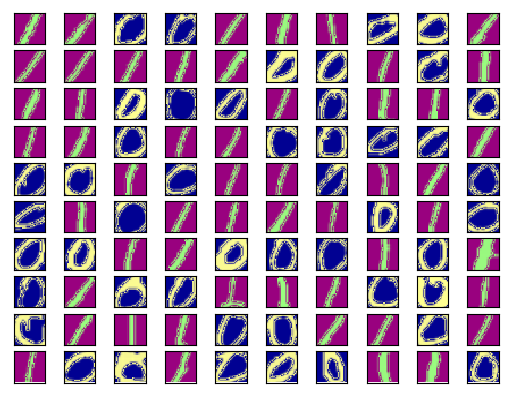

In [29]:
img_env_1_train, env_1_labels_train = transform_with_env(position_transforms_1, color_1, trainloader)
show_random_images(img_env_1_train)

In [30]:
save_env(img_env_1_train, env_1_labels_train, 5, "train")
img_env_1_test, env_1_labels_test = transform_with_env(position_transforms_1, color_1, testloader)

save_env(img_env_1_test, env_1_labels_test, 5, "test")

0it [00:00, ?it/s]/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  import sys
/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  
79it [00:04, 19.65it/s]


In [33]:
# color_1 = random_generator[MODE](digits_to_store)
position_transforms_1 = {
    zoom_digits: generate_transform_env(zoom_factors, digits_to_store),
    rotate_digits: generate_transform_env(angles, digits_to_store),
}

0it [00:00, ?it/s]/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  import sys
/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  
469it [00:38, 12.31it/s]


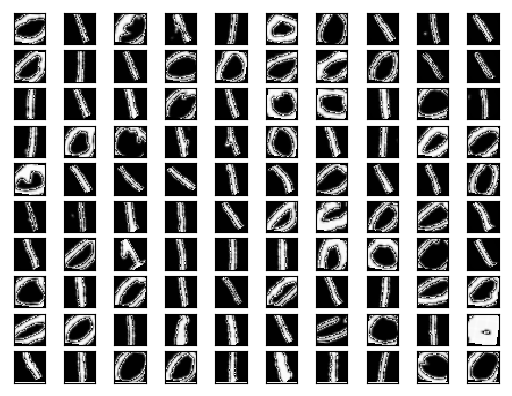

In [34]:
img_env_1_train, env_1_labels_train = transform_with_env(position_transforms_1, None, trainloader)
show_random_images(img_env_1_train)

In [35]:
save_env(img_env_1_train, env_1_labels_train, 1, "train")
img_env_1_test, env_1_labels_test = transform_with_env(position_transforms_1, color_1, testloader)

save_env(img_env_1_test, env_1_labels_test, 1, "test")

0it [00:00, ?it/s]/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  import sys
/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/aten/src/ATen/native/IndexingUtils.h:25.)
  
79it [00:03, 21.10it/s]
